## Imports

In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

## Importing Data

In [2]:
data_dir = "./data/DopantUptake/DopantUptake/Data"
samples = [os.path.join(data_dir, sample) for sample in os.listdir(data_dir)]


sample_dfs = {}
for sample in samples:
    sample_name = os.path.basename(sample).split('.')[0]
    sample_dfs[sample_name] = pd.read_csv(sample, sep='\t', skiprows=1, na_values=["Failed"])

def sorter(item):
    if item[0].startswith('Sample'):
        return int(item[0].split(' ')[-1])
    else: return 0

sample_dfs = dict( sorted(sample_dfs.items(), key=sorter) )

In [3]:
sample_dfs.keys()

dict_keys(['Reference_bare sensor 1', 'Reference_bare sensor 2', 'Reference_bare sensor 3', 'Sample 1', 'Sample 2', 'Sample 3', 'Sample 12', 'Sample 15', 'Sample 21', 'Sample 22', 'Sample 23', 'Sample 24', 'Sample 39', 'Sample 50', 'Sample 53', 'Sample 58', 'Sample 61', 'Sample 80', 'Sample 81'])

In [4]:
sample_dfs['Sample 12']

,Time [s],R2_m9 [ng/cm^2],C1_m [ng/cm^2]
0,0.0000,NaN,NaN
1,1.3259,NaN,NaN
2,2.6424,NaN,NaN
3,3.9720,NaN,NaN
4,5.3007,NaN,NaN
...,...,...,...
4395,1764.2580,749.44,749.82
4396,1764.6506,754.17,751.57
4397,1765.0690,752.55,749.63
4398,1765.5342,751.58,750.93


## Plotting Data

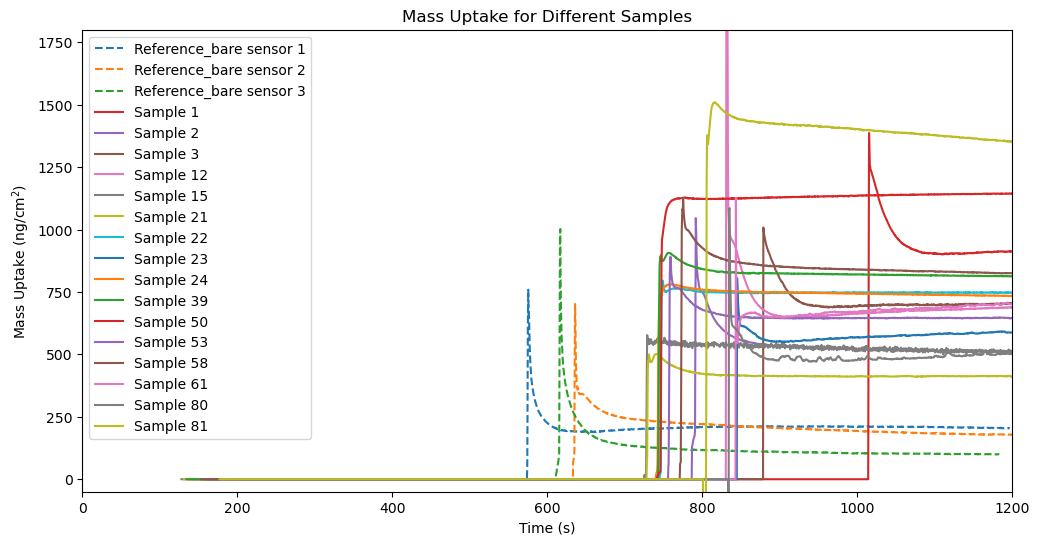

In [23]:
plt.figure(figsize=(12, 6))
plt.title('Mass Uptake for Different Samples')
plt.xlabel('Time (s)')
plt.ylabel('Mass Uptake (ng/cm$^2$)')

for sample_name in sample_dfs:
    if sample_name.startswith('Sample'): linestyle = '-'
    else: linestyle = '--'
    t = sample_dfs[sample_name]['Time [s]']
    m = sample_dfs[sample_name]['C1_m [ng/cm^2]']
    plt.plot(t, m, label=sample_name, linestyle=linestyle)


plt.xlim(0, 1200)
plt.ylim(-50, 1800)
plt.legend()

## Isolating Uptakes

### Grouped by highest dm/dt

In [87]:
cropped_sample_dfs_highest = {}
df_list = []

for sample_name in sample_dfs:

    sample_df = sample_dfs[sample_name]
    sample_df = sample_df.dropna()

    # Find middle of uptake
    t = sample_df['Time [s]']
    m = sample_df['C1_m [ng/cm^2]']

    sample_df['dm/dt'] = np.gradient(m, t)

    idx_max = int( sample_df['dm/dt'].idxmax() )

    df_cropped = sample_df.loc[(idx_max-5):(idx_max+10)]

    t0 = df_cropped.loc[idx_max, 'Time [s]']
    df_cropped['Time shifted [s]'] = df_cropped['Time [s]'] - t0

    df_cropped = df_cropped.reset_index(drop=True)
    
    # Set up this part of the combined df
    temp = df_cropped[['Time shifted [s]', 'C1_m [ng/cm^2]']].copy()
    temp = temp.rename(columns={'C1_m [ng/cm^2]': sample_name})
    temp = temp.set_index('Time shifted [s]')
    df_list.append(temp)

    # Add cropped sample df to dict
    cropped_sample_dfs_highest[sample_name] = df_cropped

merged_df = pd.concat(df_list, axis=1) # concatenate all along columns, automatically aligns on index/time. If no data for that time in a given column, NaN entered.
merged_df = merged_df.sort_index()
merged_df = merged_df.groupby(merged_df.index).first() # Remove duplicate times/associated NaNs

C:\Users\willi\AppData\Local\Temp\ipykernel_3116\1101613382.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['dm/dt'] = np.gradient(m, t)
C:\Users\willi\AppData\Local\Temp\ipykernel_3116\1101613382.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cropped['Time shifted [s]'] = df_cropped['Time [s]'] - t0
C:\Users\willi\AppData\Local\Temp\ipykernel_3116\1101613382.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [44]:
merged_df

,Reference_bare sensor 1,Reference_bare sensor 2,Reference_bare sensor 3,Sample 1,Sample 2,Sample 3,Sample 12,Sample 15,Sample 21,Sample 22,Sample 23,Sample 24,Sample 39,Sample 50,Sample 53,Sample 58,Sample 61,Sample 80,Sample 81
Time shifted [s],,,,,,,,,,,,,,,,,,,
-3.0976,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2.6948,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2.5440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2.4190,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2.3158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.7699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,780.09,NaN,NaN,NaN,NaN
4.7950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,613.09,NaN
4.8216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1043.66,NaN,NaN,NaN,NaN,NaN


In [39]:
# Check

for col in list(merged_df.columns):
    print(merged_df[col].count())

16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16


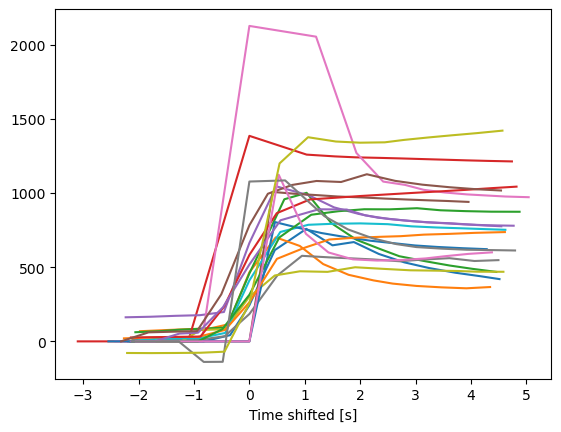

In [50]:
for col in list(merged_df.columns):
    merged_df[col].dropna().plot()

In [ ]:
cropped_sample_dfs_highest.keys()

dict_keys(['Reference_bare sensor 1', 'Reference_bare sensor 2', 'Reference_bare sensor 3', 'Sample 1', 'Sample 2', 'Sample 3', 'Sample 12', 'Sample 15', 'Sample 21', 'Sample 22', 'Sample 23', 'Sample 24', 'Sample 39', 'Sample 50', 'Sample 53', 'Sample 58', 'Sample 61', 'Sample 80', 'Sample 81'])

In [ ]:
len(cropped_sample_dfs_highest)

19

In [ ]:
cropped_sample_dfs_highest['Sample 2']

,Time [s],R1_m5 [ng/cm^2],C1_m [ng/cm^2],dm/dt,Time shifted [s]
0,788.7621,159.89,162.43,10.573461,-2.2330
1,789.2139,165.75,166.18,11.000616,-1.7812
2,789.6663,172.60,172.38,11.775053,-1.3288
3,790.1044,176.80,176.72,29.940592,-0.8907
4,790.5357,182.49,198.14,516.270839,-0.4594
5,790.9951,592.01,663.64,903.325806,0.0000
6,791.4806,1060.09,1045.79,385.726374,0.4855
7,792.0720,1007.71,984.74,-146.321361,1.0769
8,792.5237,923.96,903.78,-139.038109,1.5286
9,792.9692,876.88,859.50,-84.628283,1.9741


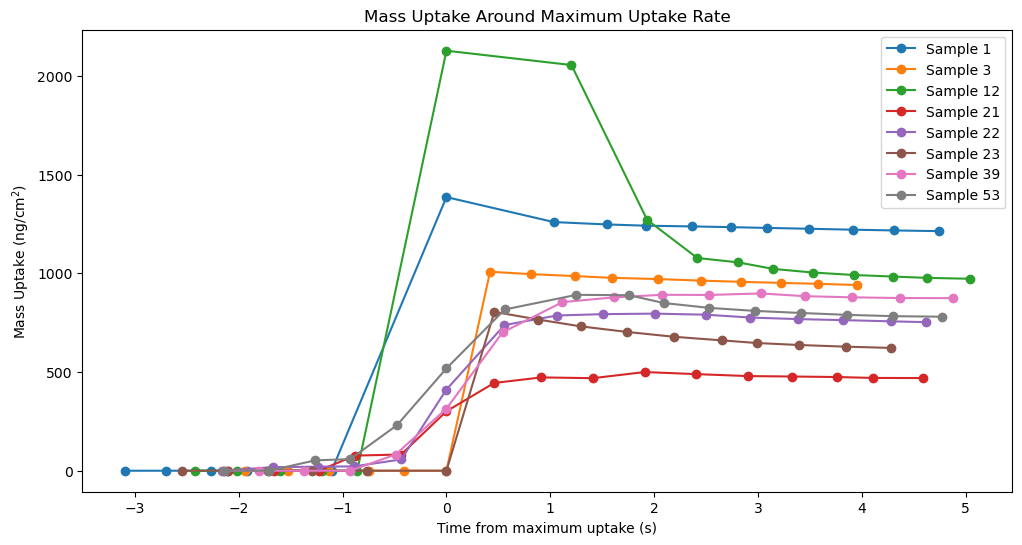

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Mass Uptake Around Maximum Uptake Rate')
plt.xlabel('Time from maximum uptake (s)')
plt.ylabel('Mass Uptake (ng/cm$^2$)')

for sample_name in list(cropped_sample_dfs_highest.keys())[:15]:
    if sample_name.startswith('Sample'): 
        df_cropped = cropped_sample_dfs_highest[sample_name]
        if df_cropped.loc[0,'m'] < 1:
            plt.plot(df_cropped['t shifted'], df_cropped['m'], marker='o', linestyle='-', label=sample_name)

plt.legend()

### Grouped by initial uptake

In [3]:
cropped_sample_dfs_first = {}

for sample_name in sample_dfs:

    sample_df = sample_dfs[sample_name]
    sample_df = sample_df.dropna()


    idx_first = sample_df.loc[sample_df['C1_m [ng/cm^2]'] != 0].index[0] # Isolates the first nonzero uptake


    df_cropped = sample_df.loc[(idx_first-5):(idx_first+15)]

    t0 = df_cropped.loc[idx_first-1, 'Time [s]']  # Make t=0 the first point BEFORE any uptake is detected
    df_cropped['Time shifted [s]'] = df_cropped['Time [s]'] - t0

    df_cropped = df_cropped.reset_index(drop=True)
    

    cropped_sample_dfs_first[sample_name] = df_cropped
    

C:\Users\willi\AppData\Local\Temp\ipykernel_23252\709114923.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cropped['Time shifted [s]'] = df_cropped['Time [s]'] - t0
C:\Users\willi\AppData\Local\Temp\ipykernel_23252\709114923.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cropped['Time shifted [s]'] = df_cropped['Time [s]'] - t0
C:\Users\willi\AppData\Local\Temp\ipykernel_23252\709114923.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [111]:
cropped_sample_dfs_first.keys()

dict_keys(['Reference_bare sensor 1', 'Reference_bare sensor 2', 'Reference_bare sensor 3', 'Sample 1', 'Sample 2', 'Sample 3', 'Sample 12', 'Sample 15', 'Sample 21', 'Sample 22', 'Sample 23', 'Sample 24', 'Sample 39', 'Sample 50', 'Sample 53', 'Sample 58', 'Sample 61', 'Sample 80', 'Sample 81'])

In [112]:
cropped_sample_dfs_first['Sample 2']

,Time [s],R1_m5 [ng/cm^2],C1_m [ng/cm^2],Time shifted [s]
0,784.4969,0.00,0.00,-1.7137
1,784.8411,0.00,0.00,-1.3695
2,785.2929,0.00,0.00,-0.9177
3,785.7706,0.00,0.00,-0.4400
4,786.2106,0.00,0.00,0.0000
5,786.6689,129.86,130.02,0.4583
6,787.0951,135.30,136.08,0.8845
7,787.5232,146.60,144.26,1.3126
8,787.9684,151.61,151.42,1.7578
9,788.3119,156.44,156.65,2.1013


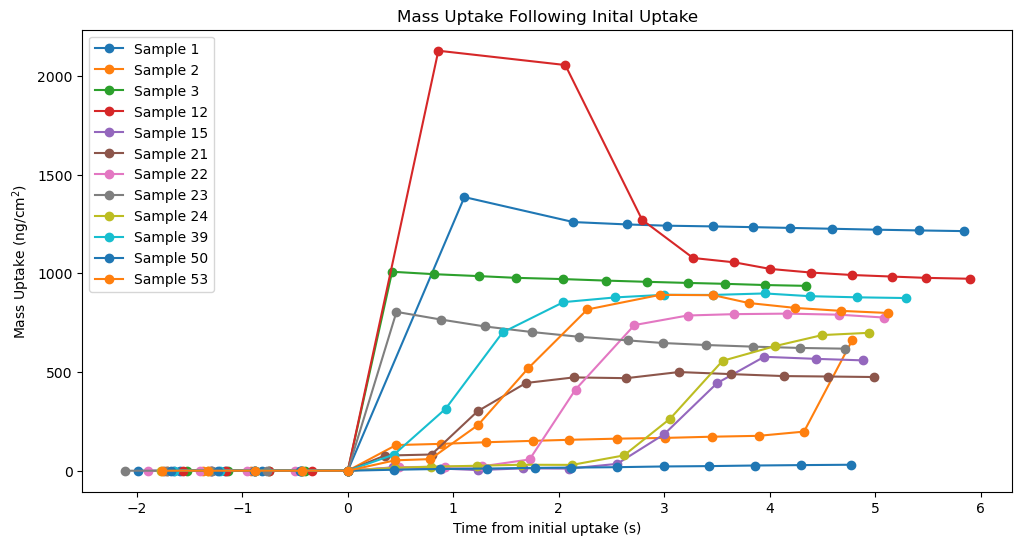

In [113]:
plt.figure(figsize=(12, 6))
plt.title('Mass Uptake Following Inital Uptake')
plt.xlabel('Time from initial uptake (s)')
plt.ylabel('Mass Uptake (ng/cm$^2$)')

for sample_name in list(cropped_sample_dfs_first.keys())[:15]:
    if sample_name.startswith('Sample'): 
        df_cropped = cropped_sample_dfs_first[sample_name]
        if df_cropped.loc[0,'C1_m [ng/cm^2]'] < 1:
            plt.plot(df_cropped['Time shifted [s]'], df_cropped['C1_m [ng/cm^2]'], marker='o', linestyle='-', label=sample_name)

plt.legend()

## Analytic Solution for Given Boundary Conditions

### Background

$$
\frac{\partial C}{\partial t} = D \frac{\partial^2 C}{\partial x^2}
$$
#### Boundary Conditions

**Top (x=0):**

 - Inhomogeneous Dirichlet

 - $C(0, t) = C_0$

 - Drop on polymer surface provides effectively constant concentration at the top boundary.

**Bottom (x=L):**

 - Neumann

 - $\frac{\partial C}{\partial x} \left(L, t \right) = 0$

 - Gold cathode on top of the quartz prevents flux through the lower boundary of the polymer.

  #### Initial Conditions

 - $C(x, t_0) = 0 $

 #### Shifted Solution

 To recover homogeneous boundary conditions, shift the solution by $C_0$ (i.e., a function that obeys the boundary conditions, $w(x,t) = C_0$).

 $$
 u(x,t) = C(x,t) - C_0
 $$

 #### Separation of Variables

 $$
 
 u(x, t) = X(x)T(t)

 \\[1em]

 X(x)T'(t) = D X''(x)T(t)

 \\[1em]

 \frac{T'}{DT} = \frac{X''}{X} \equiv -\lambda

 \\[1em]

 T'(t) + D \lambda T(t) = 0, \qquad X''(x) + \lambda X(x) = 0

 $$

 #### Spatial Eigenvalue Problem

 $$
 X'' + \lambda X = 0
 $$

 **Solution:**

 $$
 X(x) = A \sin(\sqrt{\lambda}x) + B \cos(\sqrt{\lambda} x)
 $$

 Apply boundary conditions to solve for A and B. 

 **Top (Dirichlet Condition):** 

 $$
 X(0) = 0 \rightarrow B = 0
 $$

**Bottom (Neumann Condition):**

$$

X'(x) = A\sqrt{\lambda} \cos(\sqrt{\lambda} x)

\\[1em]

X'(L) = cos(\sqrt{\lambda} L) 

\\[1em]

cos(\sqrt{\lambda} L) = 0

\\[1em]

\sqrt{\lambda} L = (m+1/2)\pi, \qquad m = 0, 1, 2,...

$$

#### Time ODE

$$
T'_m (t) + D \lambda_m T_m(t) = 0
$$

**Solutions:**

$$
T_m(t) = e^{-D \lambda_m t}
$$

#### General Solution

$$

u(x, t) = \sum_{m=0}^\infty a_m \sin(\sqrt{\lambda_m}x) e^{-D \lambda_m t}

\\[1em]

C(x, t) = C_0 + \sum_{m=0}^\infty a_m \sin(\sqrt{\lambda_m}x) e^{-D \lambda_m t}

\\[1em]

\lambda_m = \left( \frac{(m+1/2)\pi}{L} \right)^2

\\[1em]

a_m = \frac{2}{L} \int_0^L (C(x,t_0) - C_0) \sin(\sqrt{\lambda_m} x) dx

\\[1em]

a_m = \frac{-2C_0}{L} \int_0^L \sin(\sqrt{\lambda_m} x) dx

\\[1em]

a_m = \frac{-2C_0 }{L \sqrt{\lambda_m}} 
$$

### Implementation

In [9]:
def analytic_grid(C0, D, L, tf, Nx=500, Nt=500, M=500):
    '''
    Computes the analytic solution to the diffusion equation for the given boundary and initial conditions.
    Returns solution as an array of format C[t, x] and size (Nt, Nx).
    '''
    t = np.linspace(0, tf, Nt)
    x = np.linspace(0, L, Nx)
    
    T, X = np.meshgrid(t,x, indexing='ij')

    C = np.full((Nt, Nx), C0, dtype='float')

    for m in np.arange(M):
        lambda_m = ( (m+0.5)*np.pi / L )**2
        a_m = -(2*C0) / (L*np.sqrt(lambda_m))
        C += a_m*np.sin(np.sqrt(lambda_m)*X)*np.exp(-D*lambda_m*T)

    return C

def an_uptake(C0, D, L, times, Nx=500, M=500):
    '''
    Computes the analytic solution to the diffusion equation for the given boundary and initial conditions.
    Computes the mass uptake at all times in the input vector t for comparison.

    C0: Initial concentration of the solvent drop [ng/cm^3]
    D: Diffusion coefficient [cm^2/s]
    L: Film thickness [cm]
    times: different time points [s]
    '''
    
    x = np.linspace(0, L, Nx) # [cm]
    dx = L/Nx  # [cm]

    uptakes = []

    for t in times:

        C = np.full(Nx, C0, dtype='float')

        for m in np.arange(M):
            lambda_m = ( (m+0.5)*np.pi / L )**2
            a_m = -(2*C0) / (L*np.sqrt(lambda_m))
            C += a_m*np.sin(np.sqrt(lambda_m)*x)*np.exp(-D*lambda_m*t)

        uptakes.append( np.sum(C*dx) ) # [ng/cm^2]

    return uptakes


def C_uptake(C, L=1, tf=1):
    '''
    Calculates the mass uptake over time for concentration profile data.
    Integrates concentration profile to get total solute for each time.
    '''

    Nx = C.shape[1]
    Nt = C.shape[0]
    dx = L/Nx
    dt = tf/Nt

    uptake_data = []

    for i in range(C.shape[0]):
        t = i*dt
        m = np.sum(C[i]*dx)

        uptake_data.append([t, m])

    return np.array(uptake_data).T


### Testing

In [132]:
C0 = 5
D = 0.5
L = 1
tf = 5



C = analytic_grid(C0, D, L, tf)

C

array([[ 5.00000000e+00, -8.94880336e-01,  4.85846559e-01, ...,
         3.18290617e-03, -3.18304830e-03,  3.18309568e-03],
       [ 5.00000000e+00,  4.92013697e+00,  4.84030594e+00, ...,
         2.89493066e-17, -7.89362554e-16, -1.05230602e-16],
       [ 5.00000000e+00,  4.94352642e+00,  4.88706416e+00, ...,
         1.65091145e-11,  1.62593737e-11,  1.61774043e-11],
       ...,
       [ 5.00000000e+00,  4.99995698e+00,  4.99991396e+00, ...,
         4.98633335e+00,  4.98633315e+00,  4.98633308e+00],
       [ 5.00000000e+00,  4.99995751e+00,  4.99991501e+00, ...,
         4.98650125e+00,  4.98650105e+00,  4.98650099e+00],
       [ 5.00000000e+00,  4.99995803e+00,  4.99991606e+00, ...,
         4.98666709e+00,  4.98666690e+00,  4.98666683e+00]])

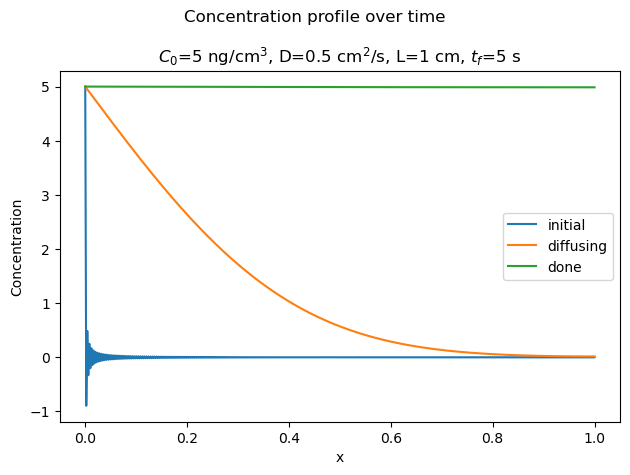

Total Solute:
t=0.00s: 0.0088
t=0.20s: 1.7876
t=2.50s: 4.8157
t=5.00s: 4.9915


In [140]:
L = 1
tf = 5


x = np.linspace(0, L, C.shape[1])
dx = L/C.shape[1]
dt = tf/C.shape[0]

plt.plot(x, C[0], label='initial')
plt.plot(x, C[10], label = 'diffusing')
plt.plot(x, C[-1], label='done')
plt.xlabel('x')
plt.ylabel('Concentration')
plt.suptitle(f"Concentration profile over time")
plt.title("$C_0$=5 ng/cm$^3$, D=0.5 cm$^2$/s, L=1 cm, $t_f$=5 s")
plt.legend()
plt.tight_layout()
plt.show()

print("Total Solute:")
print(f't=0.00s: {np.sum(C[0]*dx):.4f}')
print(f't={20*dt:.2f}s: {np.sum(C[20]*dx):.4f}')
print(f't={250*dt:.2f}s: {np.sum(C[250]*dx):.4f}')
print(f't=5.00s: {np.sum(C[-1]*dx):.4f}')

Text(0, 0.5, 'm')

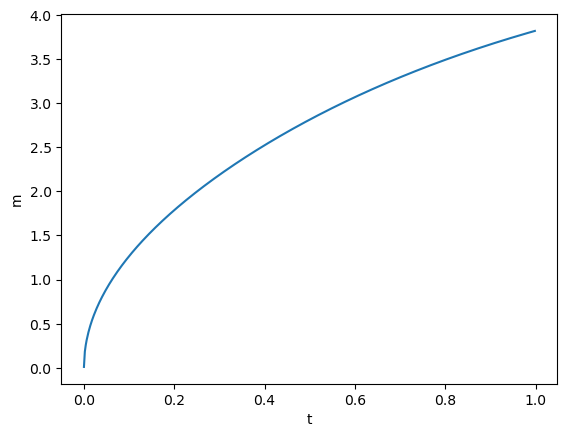

In [19]:
uptake_data = C_uptake(C)

plt.plot(uptake_data[0], uptake_data[1])

plt.xlabel('t')
plt.ylabel('m')



Text(0.5, 1.0, 'Mass Uptake over Time')

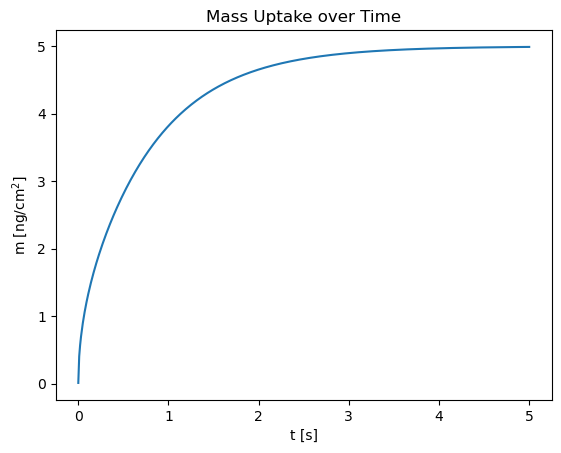

In [121]:
C0 = 5
D = 0.5
L = 1
times = np.linspace(0, 5, 500)

uptake_data = an_uptake(C0, D, L, times)

plt.plot(times, uptake_data)
plt.xlabel('t [s]')
plt.ylabel('m [ng/cm$^2$]')
plt.title('Mass Uptake over Time')

As expected, mass uptake asymptotically approaches the maximum possible uptake, $C_0 \cdot L$. This is because the highest concentration profile possible is the steady state profile $C(x,t)=C_0$.

## Initial Conditions and Units

### Initial Conditions from Slides

*Assuming constant-D simple diffusion*, the uptake curve depends on three parameters:

- **Concentration of Solvent Drop:** From slides: "Loaded solution (50 μL, 2 mg/mL) is added to the existing solvent to introduce dopant which results in mass uptake in the film which we model with the Sauerbrey formula". Thus, $$C_{dopant} = 2 \text{ mg/mL} = 2 \text{ mg/cm}^3 = 2 \times 10^3 \text{ ng/cm}^3$$ 

- **Boundary concentration (C0):** A simple calculation shows that using the dopant concentration as $C_0$ produces far too small of a final uptake. This suggests that mass uptake is dominated by solvent diffusion into the film. Thus, the density of the solvent is used as the effective boundary concentration in units mass per unit volume.

    - The final steady-state uptake of the samples shows that solvent density is somewhat less than the density of water, $C_0 = 1 \text{ g/mL} = 1 \times 10^9 \text{ ng/cm}^3$. $$m_f = L \cdot C_0 \rightarrow C_0 = m_f/L$$
 
    - Because the units for $L$ [$\text{cm}$] and $t$ [$\text{s}$] cancel with the units of $D$ [$\text{cm}^2/\text{s}$], any units for concentration can be used.


- **Diffusion Coefficient (D):** This is the independant variable that must be determined via fitting. Measured in $\text{cm}^2/\text{s}$.

- **Film Thickness (L):** Given per film in $[\text{\AA} = 10^{-8} \text{ cm}$ inside `QCMSummary.xlsx`.

### Units of Mass Uptake

- Measured in $\text{ng}/\text{cm}^2$ in the `.csv` files. 

- Calculated from $m(t) = \int{C(x, t) dx}$.

- Thus, we need initial concentration $C_0$ in $\text{ng/cm}^3$.


## Fitting Data to Analytic Uptake Curves

### Importing Thicknesses

In [5]:
thicknesses = pd.read_excel('./data/DopantUptake/DopantUptake/QCMSummary.xlsx', sheet_name='Thicknesses', index_col='Sample')

thicknesses

,Thickness [A]
Sample,
2,233.00000
15,205.75000
21,237.50000
22,282.25000
24,304.25000
39,257.00000
50,290.25000
53,234.50000
58,321.50000


### Sample 53

In [7]:
df = cropped_sample_dfs_first['Sample 53']

df = df[df['Time shifted [s]'] >= 0]

df

,Time [s],R1_m5 [ng/cm^2],C1_m [ng/cm^2],Time shifted [s]
4,755.6474,0.00,0.00,0.0000
5,756.0940,54.55,52.60,0.4466
6,756.4296,59.52,58.80,0.7822
7,756.8808,170.48,230.82,1.2334
8,757.3564,474.46,518.39,1.7090
9,757.9181,848.96,816.87,2.2707
10,758.6082,900.21,890.98,2.9608
11,759.1141,898.65,889.12,3.4667
12,759.4475,852.03,849.68,3.8001
13,759.8885,827.10,824.80,4.2411


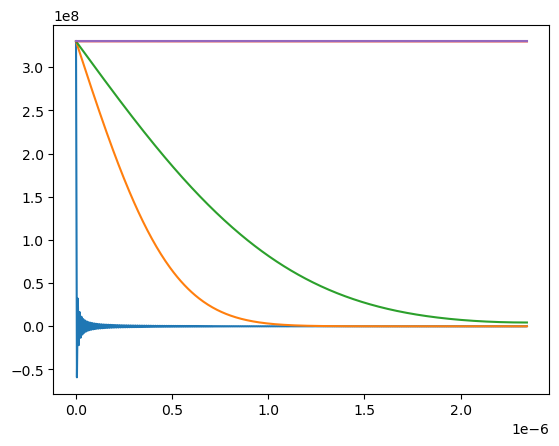

In [52]:
# Test plot

times = df['Time shifted [s]'] # [s]
m_exp = df['C1_m [ng/cm^2]']   # [ng/cm^2]


L = thicknesses.loc[53, 'Thickness [A]'] # [A]
L *= 1e-8 # [cm]

# Divide final uptake (assuming steady state reached) by the length to get assumed boundary concentration
C0 = m_exp.iloc[-1]/L # [ng/cm^3]

D = 5e-12 # [cm^2/s]

Nx = 500

tf = times.iloc[-1]

an_soln = analytic_grid(C0, D, L, tf, Nx=Nx)


x = np.linspace(0, L, Nx)

plt.plot(x, an_soln[0], label = 'initial')

plt.plot(x, an_soln[1], label = '1')

plt.plot(x, an_soln[5], label='5')

plt.plot(x, an_soln[250])

plt.plot(x, an_soln[-1])


In [ ]:
print(f'Assumed boundary concentration: {C0:.2e} ng/cm^3')

# this is likely the density of the solvent
# Density of water is 1e9 ng/cm3

Assumed boundary concentration: 3.30e+08 ng/cm^3


In [58]:
m_an = {}

for D in np.linspace(1e-15, 1e-12, 100):
    m_an[D] = an_uptake(C0, D, L, times)

m_an

{1e-15: [1.3625868480163568,
  8.64401782596359,
  11.180221294570094,
  13.835714336138508,
  16.145972783986217,
  18.490625356666914,
  21.002559175420892,
  22.661643868667618,
  23.689449095124317,
  24.982020823579436,
  26.194324711698815,
  27.368791857096976,
  28.508735190621096,
  29.58614775693934,
  30.69240701463876,
  31.813752330172544,
  32.864572445608125],
 1.109090909090909e-14: [1.3625868480163568,
  26.934711343726427,
  35.393029433879164,
  44.244172048351835,
  51.94247092158257,
  59.754192374831895,
  68.12239243049699,
  73.6490894744784,
  77.07278079110377,
  81.37833260781674,
  85.4164294747135,
  89.32842882296173,
  93.12537952598593,
  96.7140079011624,
  100.3986794156324,
  104.13356280997736,
  107.6335172352752],
 2.1181818181818178e-14: [1.3625868480163568,
  36.92410973574802,
  48.61401814595542,
  60.84650794481902,
  71.48560173115982,
  82.28136887494612,
  93.8461314186324,
  101.48394513683951,
  106.21542914593553,
  112.16562340266391,
 

In [ ]:
list(m_an.keys())[::20]

[1e-15,
 2.028181818181818e-13,
 4.046363636363636e-13,
 6.064545454545454e-13,
 8.082727272727272e-13]

In [47]:
list(m_an.items())[::20]

[(1e-15,
  [4.128784285564486,
   26.192301074925222,
   33.877269590085135,
   41.92369830500689,
   48.924029174890414,
   56.028577931753375,
   63.640006804964464,
   68.66721136067395,
   71.78157142791905,
   75.69820239216149,
   79.3716131915412,
   82.93037460252283,
   86.38452516088185,
   89.64920078824497,
   93.00128498427178,
   96.3990815535013,
   99.58317920267615]),
 (2.028181818181818e-13,
  [4.128784285564486,
   341.26938346592937,
   450.88441322305374,
   565.5881559948825,
   665.3642553355211,
   766.6353130317548,
   875.1464339297461,
   946.8021656746959,
   991.1660248146677,
   1046.8937541815108,
   1099.0476854298,
   1149.407713006109,
   1198.061047332119,
   1243.7688460199406,
   1290.340891508807,
   1337.0877009757771,
   1380.3898218855452]),
 (4.046363636363636e-13,
  [4.128784285564486,
   481.0633050201801,
   635.9061319902664,
   797.9888021090698,
   938.987011043248,
   1081.8058394925047,
   1233.431510825359,
   1331.770608891928,
   139

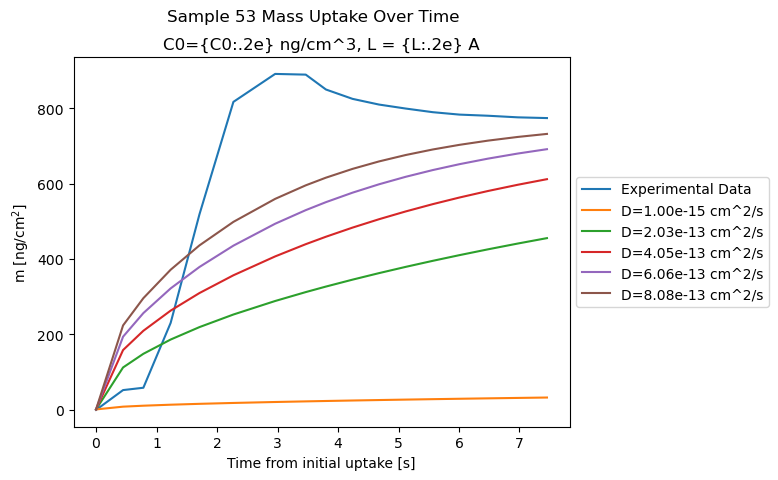

In [62]:
plt.plot(times, m_exp, label='Experimental Data')

for D, uptake in list(m_an.items())[::20]:

    plt.plot(times, uptake, label=f'D={D:.2e} cm^2/s')


plt.xlabel('Time from initial uptake [s]')
plt.ylabel('m [ng/cm$^2$]')

plt.suptitle('Sample 53 Mass Uptake Over Time')
plt.title('C0={C0:.2e} ng/cm^3, L = {L:.2e} A')

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

### Test Function

In [ ]:
def L2norm(soln, ref_soln):
    '''
    Computes the distance between "points" in the solution vector and analytic solution vector.
    This is normalized by the norm of the analytic solution.  
    '''
    err = np.linalg.norm(soln - ref_soln) / np.linalg.norm(ref_soln)
    return err

def test_uptake(D_range, L, times, m_exp):
    '''  
    Shows normalized L2 error between the experimental and calculated uptake at specified times.
    
    C0_range: tuple of form (C0_low, C0_high, C0_countby)
    D_range: tuple of form (D_low, D_high, D_countby)
    '''

    D_low = D_range[0]
    D_high = D_range[1]
    D_countby = D_range[2]
    C0_values = np.arange(C0_low, C0_high, C0_countby)
    D_values = np.arange(D_low, D_high, D_countby)

    err_rows = []
    err_cols = ['C0', 'D', 'err']

    for C0 in tqdm(C0_values):
        for D in D_values:
            m_an = an_uptake(C0, D, L, times)
            err = L2norm(m_an, m_exp)
            err_rows.append([C0, D, err])

    return pd.DataFrame(err_rows, columns=err_cols)

In [11]:
C0_range = (600, 1000, 100)
D_range = (0.01, 10, 0.1)

err_data = test_uptake(C0_range, D_range, L, times, m_exp)

err_D1 = err_data.loc[err_data['D']==1
                      ]
# plt.plot(err_data['C0'], err_data['err'])

100%|██████████| 4/4 [01:21<00:00, 20.37s/it]
